<a href="https://colab.research.google.com/github/ViktoriiaKharchenko/Neural-Networks/blob/master/ECGDence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt # Отрисовка изображений


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras


In [4]:
# number_of_classes = 4
# mypath = 'drive/MyDrive/training2017/'
# onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[0] == 'A')]
# bats = [f for f in onlyfiles if f[7] == 'm']
# check = 9000
# mats = [f for f in bats if (np.shape(sio.loadmat(mypath + f)['val'])[1] >= check)]
# size = len(mats)
# print('Training size is ', len(mats))
# X = np.zeros((len(mats), check))
# for i in range(len(mats)):
#     X[i, :] = sio.loadmat(mypath + mats[i])['val'][0, :check]
# print(X.shape)
# datasetPath = 'drive/MyDrive/Colab Notebooks/data.csv'
datasetPath = 'drive/MyDrive/Colab Notebooks/filteredData.csv'
resultPath = 'drive/MyDrive/Colab Notebooks/result.csv'

X = pd.read_csv(datasetPath, delimiter=',')
Y = pd.read_csv(resultPath, delimiter=',')

print(X.shape)
print(Y)


(7560, 9000)
      0.000000000000000000e+00
0                          0.0
1                          0.0
2                          1.0
3                          1.0
4                          0.0
...                        ...
7555                       0.0
7556                       2.0
7557                       0.0
7558                       0.0
7559                       0.0

[7560 rows x 1 columns]


In [5]:
# target_train = np.zeros((len(mats), 1))
# Train_data = pd.read_csv(mypath + 'REFERENCE.csv', sep=',', header=None, names=None)
# for i in range(len(mats)):
#     if Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'N':
#         target_train[i] = 0
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'A':
#         target_train[i] = 1
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'O':
#         target_train[i] = 2
#     else:
#         target_train[i] = 3
# print(target_train.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)  
# scale_features_std = StandardScaler() 
# x_train = scale_features_std.fit_transform(x_train) 
# x_test = scale_features_std.transform(x_test) 
# scale_features_mm = MinMaxScaler() 
# x_train = scale_features_mm.fit_transform(x_train) 
# x_test = scale_features_mm.transform(x_test)
print(x_train.shape)  
print(y_train.shape)  
print(y_train)


(6048, 9000)
(6048, 1)
      0.000000000000000000e+00
3297                       0.0
3703                       0.0
1629                       0.0
3085                       1.0
961                        0.0
...                        ...
3577                       0.0
488                        0.0
3695                       2.0
5808                       2.0
5746                       2.0

[6048 rows x 1 columns]


In [6]:
y_train = utils.to_categorical(y_train, 4)
y_test = utils.to_categorical(y_test, 4)
print(y_train.shape)

(6048, 4)


In [16]:
def create_model():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(9000, )))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
	#model.add(Dropout(0.5))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(512, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(256, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(256, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(128, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(128, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
	# model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	# model.add(Dropout(0.5))
  model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.1)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model


In [17]:
# Создаём пустую сеть
model = create_model()

# Обучаем сеть
history = model.fit(x_train, 
          y_train,
          batch_size=50, 
          epochs=10,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

Epoch 1/10
97/97 [==============================] - 18s 178ms/step - loss: 2274691065647.0347 - accuracy: 0.5264 - val_loss: 0.9941 - val_accuracy: 0.6033
Epoch 2/10
97/97 [==============================] - 17s 175ms/step - loss: 0.9677 - accuracy: 0.5990 - val_loss: 0.9700 - val_accuracy: 0.6033
Epoch 3/10
97/97 [==============================] - 17s 176ms/step - loss: 0.9464 - accuracy: 0.6045 - val_loss: 0.9798 - val_accuracy: 0.6033
Epoch 4/10
97/97 [==============================] - 17s 179ms/step - loss: 4026139029.0043 - accuracy: 0.6016 - val_loss: 0.9616 - val_accuracy: 0.6033
Epoch 5/10
97/97 [==============================] - 19s 193ms/step - loss: 177665199.8057 - accuracy: 0.6089 - val_loss: 0.9693 - val_accuracy: 0.6033
Epoch 6/10
97/97 [==============================] - 17s 178ms/step - loss: 0.9654 - accuracy: 0.6112 - val_loss: 0.9645 - val_accuracy: 0.6033
Epoch 7/10
97/97 [==============================] - 17s 178ms/step - loss: 0.9480 - accuracy: 0.6030 - val_loss: 

In [18]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

48/48 [==============================] - 1s 27ms/step - loss: 0.9534 - accuracy: 0.5847
[0.953363835811615, 0.5846560597419739]
Доля верных ответов на тестовых данных, в процентах: 58.4656%


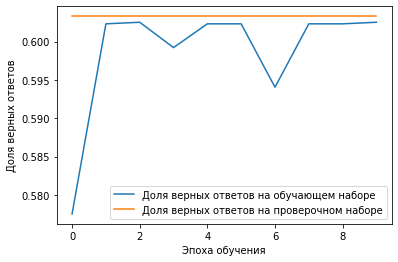

In [19]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

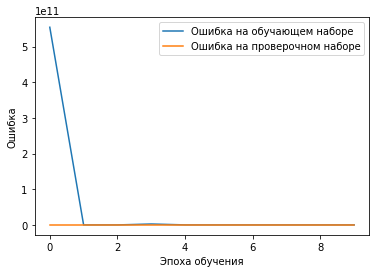

In [20]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()